# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection to work

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [22]:
# 載入 toy example 資料集
# make_blobs 參數
'''
n_samples: 待生成的樣本的總數
n_features: 每個樣本的特徵數
centers: 類別數
'''
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]
display(X)
display(y)

array([[ -1.59808528,  11.99209284,  -8.43918546,   6.01719182],
       [ -0.16759238,   7.2998735 ,  -8.07093411,   8.61246177],
       [ -0.13703844,   9.5029085 ,  -6.44800278,   6.49376428],
       [  4.56646062,   0.98352091,  -8.51645485,  -3.85617271],
       [  5.47251908,   0.97070418,   5.51251049,   4.96692964],
       [  6.77746119,   1.87125157,  -9.83948631,  -2.8225227 ],
       [  3.35913695,   0.92595711,  -7.78641122,  -1.34862453],
       [  7.18875105,  -0.43011346,  -8.03824749,  -3.60118541],
       [  4.30433354,   1.30273629,   5.78682407,   7.98789113],
       [  4.85261906,   3.74686925,  -8.02430429,  -2.56026199],
       [  4.79768152,   1.98007344, -10.38044755,  -3.44770973],
       [  3.60519768,   1.41562366,   6.04929155,   7.5804401 ],
       [  4.99080818,   0.53700803,  -7.34638833,  -2.66138789],
       [  5.9863052 ,   0.76862021,  -8.12178891,  -1.56141926],
       [  3.86882922,   0.41590053, -10.8102845 ,  -1.95219214],
       [  4.33690194,   0

array([2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2])

In [18]:
# 設定模型參數
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

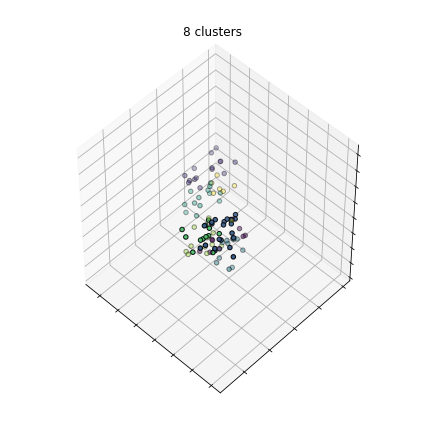

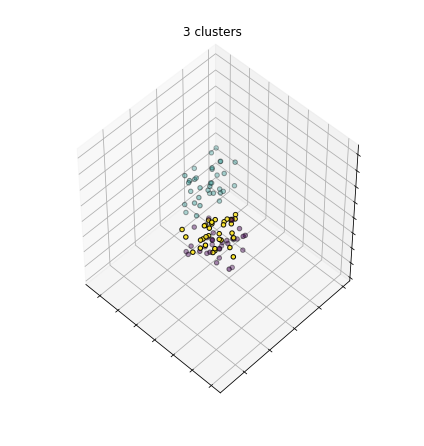

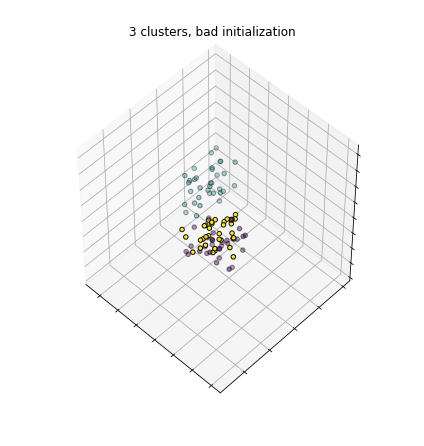

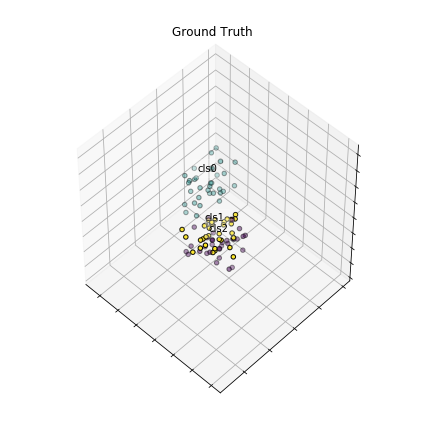

In [19]:
# 資料建模並視覺化結果
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()